In [2]:
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

from datasets import dataset_utils
from datasets.sequence_aggregator import *
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ivica Obadic\PycharmProjects\EOExplainability


In [3]:
#define the required constants and functions
num_classes = 12
dataset_folder = "C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops/"
class_mapping = os.path.join(dataset_folder, "classmapping{}.csv".format(num_classes))

training_set, validation_set, test_set = dataset_utils.get_partitioned_dataset(
        dataset_folder,
        class_mapping,
        WeeklySequenceAggregator())

sequence_lengths_per_region = dataset_utils.get_sequence_lengths_per_region([training_set, validation_set, test_set])

Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops/npy\classmapping12.csv\blocks\holl\train
loaded 20858 samples
Dataset C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops/. region holl. partition train. X:20858x(71, 16), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
precached dataset files found at C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops/npy\classmapping12.csv\blocks\holl\valid
loaded 3909 samples
Dataset C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/EO_explainability_survey/Datasets/BavarianCrops/. region holl. par

In [4]:
holl_lengths = sequence_lengths_per_region["holl"]
holl_label = ["holl"]*len(holl_lengths)
holl_data = list(zip(holl_label, holl_lengths))
nowa_lengths = sequence_lengths_per_region["nowa"]
nowa_label = ["nowa"] * len(nowa_lengths)
nowa_data = list(zip(nowa_label, nowa_lengths))
krum_lengths = sequence_lengths_per_region["krum"]
krum_label = ["krum"]*len(krum_lengths)
krum_data = list(zip(krum_label, krum_lengths))

print(sum(holl_lengths)/len(holl_lengths))
print(sum(nowa_lengths)/len(nowa_lengths))
print(sum(krum_lengths)/len(krum_lengths))

print(max(holl_lengths))
print(max(nowa_lengths))
print(max(krum_lengths))

all_data = []
all_data.extend(holl_data)
all_data.extend(nowa_data)
all_data.extend(krum_data)

sequence_lenghts_data = pd.DataFrame(all_data, columns = ["REGION", "SEQUENCE_LENGTH"])

98.0341193595342
117.39249916471768
72.06893498177855
144
144
143


Text(0.5, 0, 'Region')

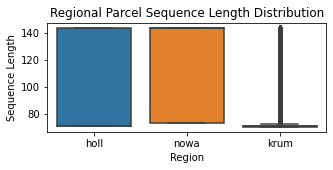

In [6]:
fig, ax1 = plt.subplots(figsize=(5, 2))
plot = sns.boxplot(x="REGION", y="SEQUENCE_LENGTH", data=sequence_lenghts_data, ax = ax1)
plot.axes.set_title("Regional Parcel Sequence Length Distribution")
plot.axes.set_ylabel("Sequence Length")
plot.axes.set_xlabel("Region")

In [19]:
ids = test_set.datasets[2].ids.tolist()
target_index = ids.index(72220580)
reflectance_values = test_set.datasets[2].X[target_index]
reflectance_values[0,:]

array([2.01800000e+03, 1.00000000e+00, 2.00000000e+00, 4.10209996e-01,
       3.47869318e-03, 1.75583783e-01, 1.45639938e-01, 3.84602693e-01,
       3.08818714e-01, 3.16109339e-01, 3.24135115e-01, 3.34929463e-01,
       3.42670443e-01, 3.41492412e-01, 3.43760381e-01, 1.47852367e-01])